In [1]:
import pandas as pd 

titanic_train = pd.read_csv('datasets/titanicdata/train.csv')
titanic_test = pd.read_csv('datasets/titanicdata/test.csv')

In [2]:
train_data = titanic_train.set_index("PassengerId")
test_data = titanic_test.set_index("PassengerId")

In [3]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

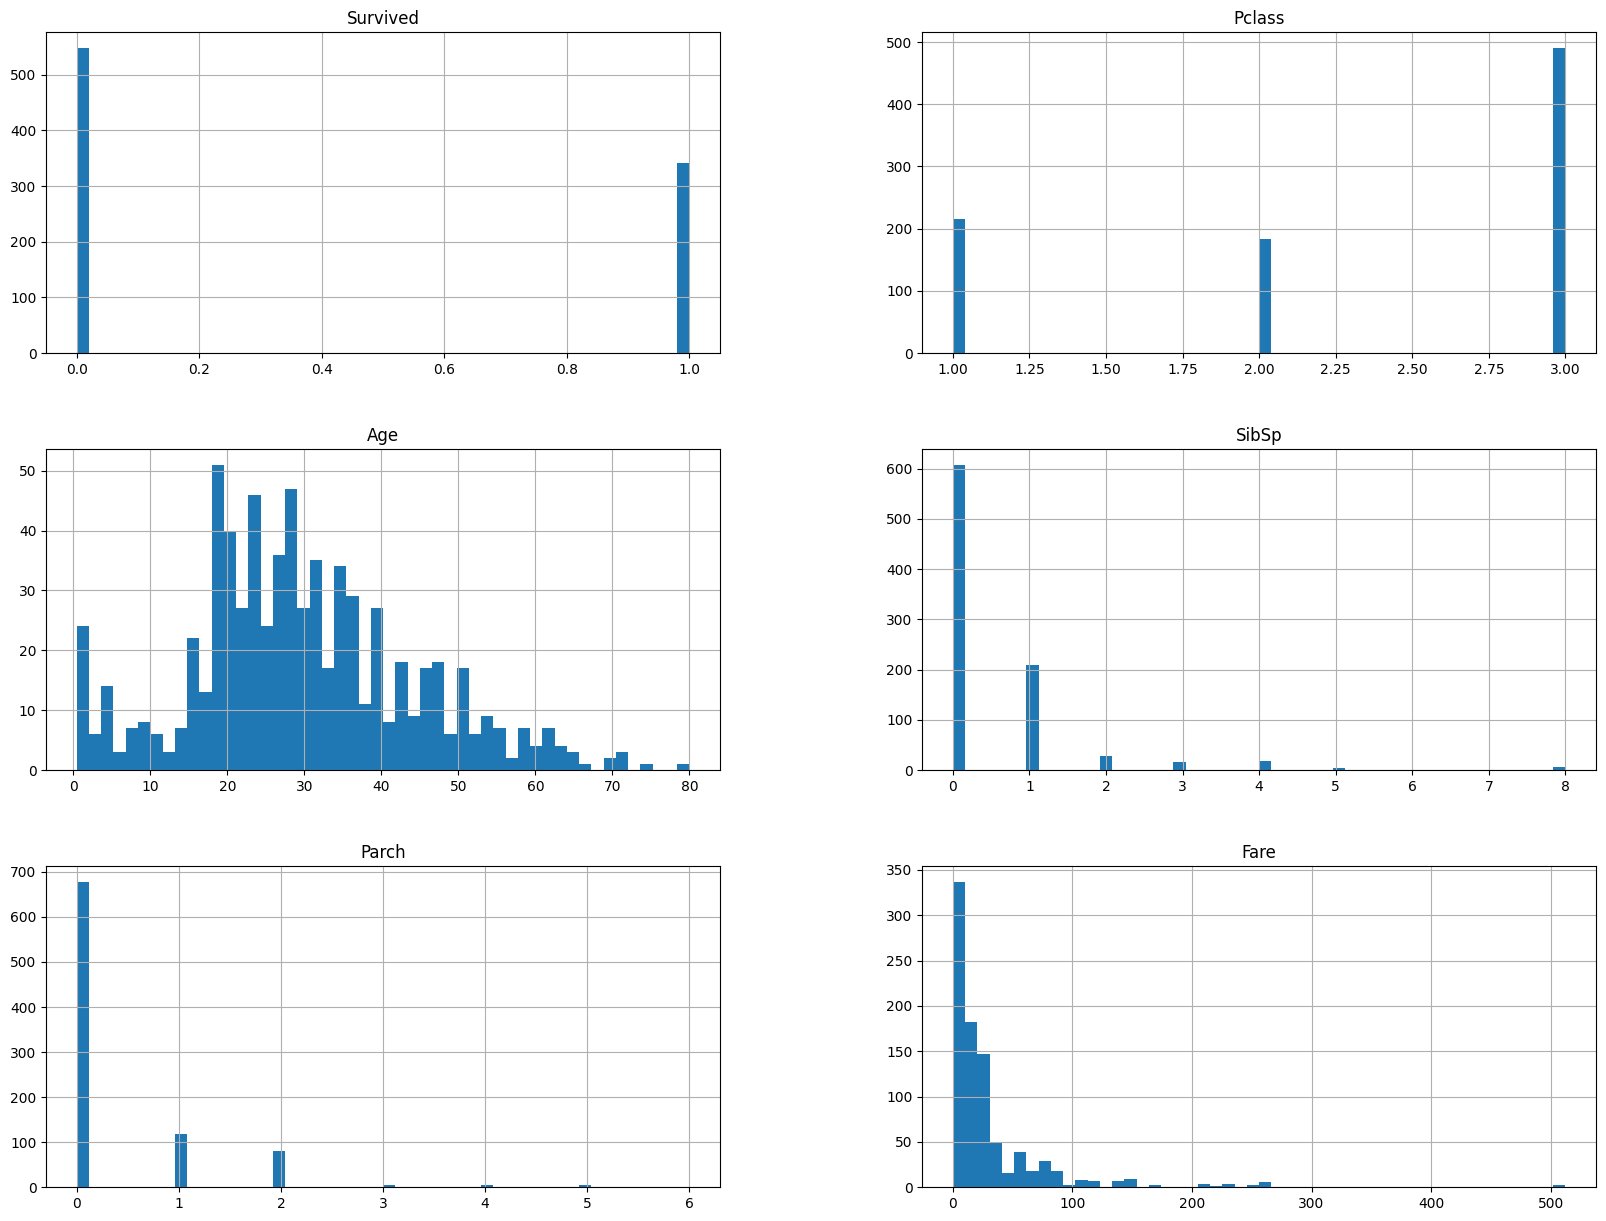

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
corr_matrix = train_data.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

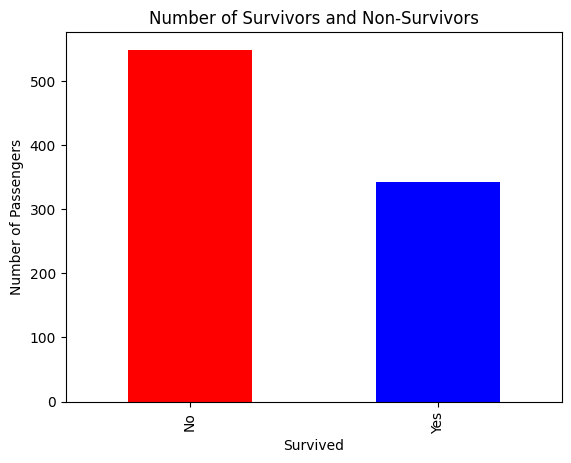

In [9]:
survived_counts = train_data['Survived'].value_counts()
survived_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Number of Survivors and Non-Survivors')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

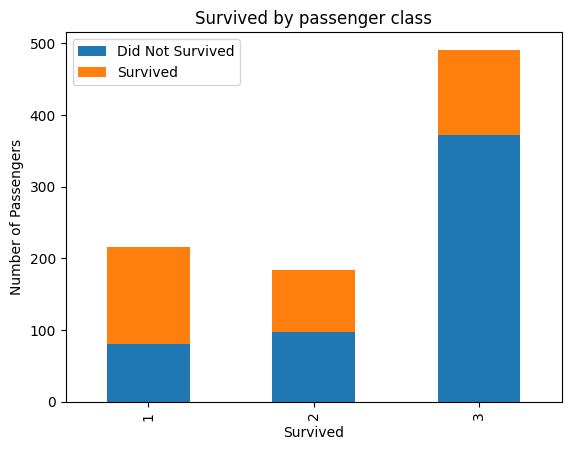

In [10]:
survived_by_class = train_data.groupby('Pclass')['Survived'].value_counts().unstack()
survived_by_class.plot(kind="bar",stacked=True)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survived by passenger class')
plt.legend(['Did Not Survived', 'Survived'])
plt.show()

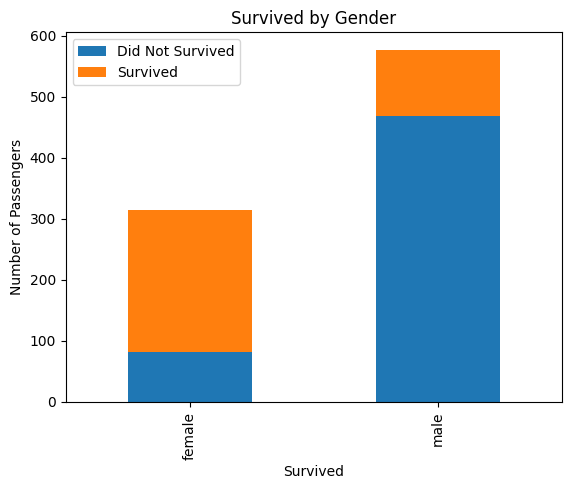

In [11]:
survived_by_class = train_data.groupby('Sex')['Survived'].value_counts().unstack()
survived_by_class.plot(kind="bar",stacked=True)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survived by Gender')
plt.legend(['Did Not Survived', 'Survived'])
plt.show()

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn .preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('imputer',SimpleImputer(strategy="median")),
  ('std_scaler',StandardScaler())
])

In [13]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
  ("imputer",SimpleImputer(strategy="most_frequent")),
  ("cat_encoder",OneHotEncoder())
])

In [14]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age","SibSp","Parch","Fare"]
cat_attribs = ["Pclass","Sex","Embarked"]

preprocess_pipeline = ColumnTransformer([
  ("num", num_pipeline, num_attribs),
  ("cat", cat_pipeline, cat_attribs)
])

In [15]:
x_train = preprocess_pipeline.fit_transform(
  train_data[num_attribs + cat_attribs])

x_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [16]:
y_train = train_data["Survived"]

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [18]:
x_test = preprocess_pipeline.transform(test_data[num_attribs+cat_attribs])
y_sgd_predict = sgd_clf.predict(x_test)

In [19]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, x_train, y_train, cv= 10)
sgd_scores.mean()

0.7856554307116105

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_forest_predict = forest_clf.predict(x_test)

forrest_scores = cross_val_score(forest_clf, x_train, y_train, cv=10)
forrest_scores.mean()

0.8092759051186016

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, x_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

In [31]:
svm_clf.fit(x_train, y_train)

SVC(gamma='auto')

In [32]:
svm_predict = svm_clf.predict(x_test)

In [23]:
from sklearn import tree
decisiontree_clf = tree.DecisionTreeClassifier()
decisiontree_clf = decisiontree_clf.fit(x_train, y_train)

In [24]:
decision_predict = decisiontree_clf.predict(x_test)

decision_scores = cross_val_score(decisiontree_clf, x_train, y_train, cv= 10)
decision_scores.mean()

0.7890262172284646

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_scores = cross_val_score(knn_clf, x_train, y_train, cv=10)
knn_scores.mean()

0.8002372034956305

In [26]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

grid_search = GridSearchCV(svm_clf,param_grid,refit = True, verbose=2)
grid_search.fit(x_train, y_train)'''

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}\n\ngrid_search = GridSearchCV(svm_clf,param_grid,refit = True, verbose=2)\ngrid_search.fit(x_train, y_train)"

In [27]:
'grid_search.best_score_'

'grid_search.best_score_'

In [28]:
'grid_search.best_params_'

'grid_search.best_params_'

In [29]:
'svm_predict = svm_clf.predict(x_test)'

'svm_predict = svm_clf.predict(x_test)'